In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

#### First, let's play around with np.r_
np.r_[concatenate along r/c, **min number of dimenstions**, ***direction that arrays will align (r/c)***', arrayA, arrayB]

In [2]:
a = np.arange(3)
np.r_['1,2,1', a,a] # triple string = 'concatenate along rows/columns, '

array([[0, 1, 2, 0, 1, 2]])

In [3]:
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

In [4]:
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

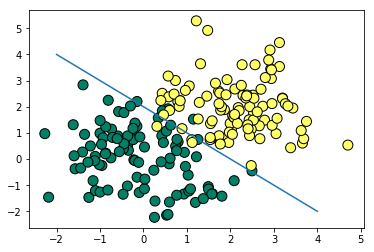

In [5]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100,
           cmap='summer', edgecolors='black')
plt.plot(np.arange(-2,5), np.arange(4,-3,-1));

In [6]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:,0].min()-1, data[:,0].max()+1
    y_min, y_max = data[:,1].min()-1, data[:,1].max()+1
    return np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

## Create a tree with the following properties:

In [7]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

### Now train the tree to fit the data:

In [8]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [9]:
xx, yy = get_grid(train_data)

In [10]:
xx.shape #same as yy.shape

(952, 898)

In [11]:
yy.ravel()

array([-3.22793726, -3.22793726, -3.22793726, ...,  6.28206274,
        6.28206274,  6.28206274])

### np.c_[] = concatenate by columns in a 2D array where each array points down rows

In [12]:
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) #makes predictions for [xx, yy] then reshapes to mesh

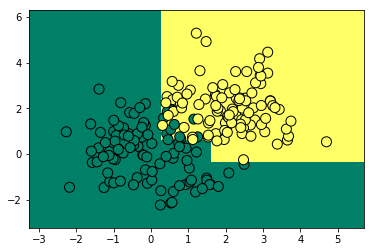

In [13]:
plt.pcolormesh(xx, yy, predicted, cmap='summer');
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=100,
           cmap='summer', edgecolors='black');

### We can see that the tree "cuts" the graph into at most 2^max_depth (2^3 in this instance) rectangles and makes a color assessment.

## Now let's visualize the tree!

In [17]:
#pip install pydotplus

In [18]:
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

In [19]:
dot_data = StringIO()
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02d\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xc3R\xa0\xd…

## How do binary trees work with numerical features, like in the example above?

In [23]:
data = pd.DataFrame({'Age':[17,64,18,20,38,49,55,25,29,31,33],
                    'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [24]:
data.sort_values(by = 'Age')

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [30]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

dot_data = StringIO()
export_graphviz(age_tree, feature_names=['Age'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xed\x00\x00\x03\x07\x08\x06\x00\x00\x00\x14\xf4\…

### Notice that the branches are the average values of ages between 0-1 transitions

In [32]:
data2 = pd.DataFrame({'Age':  [17,64,18,20,38,49,55,25,29,31,33], 
                      'Salary': [25,80,22,36,37,59,74,70,33,102,88], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data2.sort_values('Age')

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [33]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Age', 'Salary']].values, data2['Loan Default'].values);

In [34]:
dot_data = StringIO()
export_graphviz(age_sal_tree, feature_names=['Age', 'Salary'], 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xf5\x00\x00\x02|\x08\x06\x00\x00\x00\xe7\x1f8\x9…

## Decision Tree in a regression problem

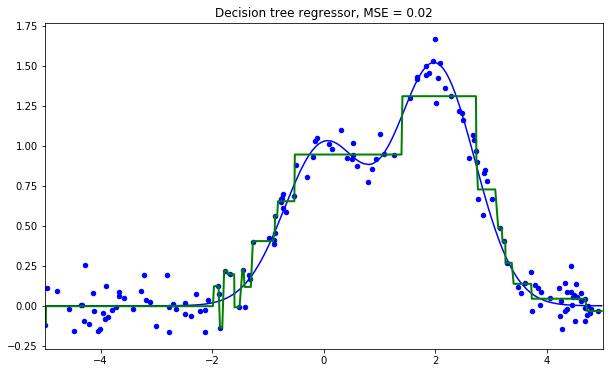

In [43]:
n_train = 150
n_test = 1000
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples)*10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(loc=0.0, scale=noise, size=n_samples)
    X = X.reshape((n_samples,-1))
    return X,y

X_train, y_train = generate(n_train, noise)
X_test, y_test = generate(n_test, noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()